In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [3]:
# Data 불러오기
election = pd.read_csv('../Data/election_2022.csv')
election

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
0,서울특별시,종로구,129968,100629,46130,49172,3115
1,서울특별시,중구,111448,84998,38244,42906,2310
2,서울특별시,용산구,199077,152068,60063,85047,4374
3,서울특별시,성동구,252087,197240,84411,103880,5365
4,서울특별시,광진구,303582,235471,109922,113733,7072
...,...,...,...,...,...,...,...
243,경상남도,산청군,31645,24913,7125,16607,464
244,경상남도,거창군,53049,41399,11963,27254,895
245,경상남도,합천군,39768,31270,6911,22742,511
246,제주특별자치도,제주시,408552,296826,157695,122084,10007


In [4]:
# 기본 통계량 확인하기
election.describe()

,선거인수,투표수,이재명,윤석열,심상정
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,176570.540323,136147.838710,64479.104839,65566.290323,3215.532258
std,141049.731983,108569.706317,56875.864428,56766.365763,2893.695797
min,8141.000000,6653.000000,1590.000000,2052.000000,109.000000
25%,47671.500000,39215.750000,17363.000000,18223.000000,709.000000
50%,154353.500000,114654.000000,48797.000000,50341.000000,2617.500000
75%,265099.250000,204189.250000,99830.750000,101949.750000,5041.000000
max,703896.000000,542027.000000,285227.000000,275155.000000,13249.000000


In [5]:
# 컬럼명 확인하기
election.columns

Index(['광역시도', '시군구', '선거인수', '투표수', '이재명', '윤석열', '심상정'], dtype='object')

In [6]:
# dimension 확인하기
election.shape

(248, 7)

In [7]:
# 컬럼별 자료 타입 확인하기
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시도    248 non-null    object
 1   시군구     248 non-null    object
 2   선거인수    248 non-null    int64 
 3   투표수     248 non-null    int64 
 4   이재명     248 non-null    int64 
 5   윤석열     248 non-null    int64 
 6   심상정     248 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 13.7+ KB


In [8]:
# NaN
election.isnull().any()

광역시도    False
시군구     False
선거인수    False
투표수     False
이재명     False
윤석열     False
심상정     False
dtype: bool

In [9]:
# election에 electionSum이라는 컬럼 생성(윤석열 + 이재명 + 심상정)
election['electionSum'] = election[['이재명', '윤석열', '심상정']].sum(axis=1)
election

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417
1,서울특별시,중구,111448,84998,38244,42906,2310,83460
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727
...,...,...,...,...,...,...,...,...
243,경상남도,산청군,31645,24913,7125,16607,464,24196
244,경상남도,거창군,53049,41399,11963,27254,895,40112
245,경상남도,합천군,39768,31270,6911,22742,511,30164
246,제주특별자치도,제주시,408552,296826,157695,122084,10007,289786


In [10]:
# electionSum이 pop의 몇 퍼센트?
election['electionRatio'] = round(election['electionSum'] / election['투표수'] * 100,2)
election

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99
...,...,...,...,...,...,...,...,...,...
243,경상남도,산청군,31645,24913,7125,16607,464,24196,97.12
244,경상남도,거창군,53049,41399,11963,27254,895,40112,96.89
245,경상남도,합천군,39768,31270,6911,22742,511,30164,96.46
246,제주특별자치도,제주시,408552,296826,157695,122084,10007,289786,97.63


In [11]:
# csv로 저장하기
election.to_csv('../Data/election_2022_job.csv', index=False)

In [12]:
elect_sum = election.pivot_table('투표수', index='광역시도', aggfunc=sum)
print(elect_sum.head())
elect_sum_order = elect_sum.sort_values(by = '투표수', ascending=False)
print(elect_sum_order.head())

           투표수
광역시도          
강원도    1015458
경기도    8518854
경상남도   2146882
경상북도   1774284
광주광역시   985492
           투표수
광역시도          
경기도    8518854
서울특별시  6501831
부산광역시  2200224
경상남도   2146882
인천광역시  1883504


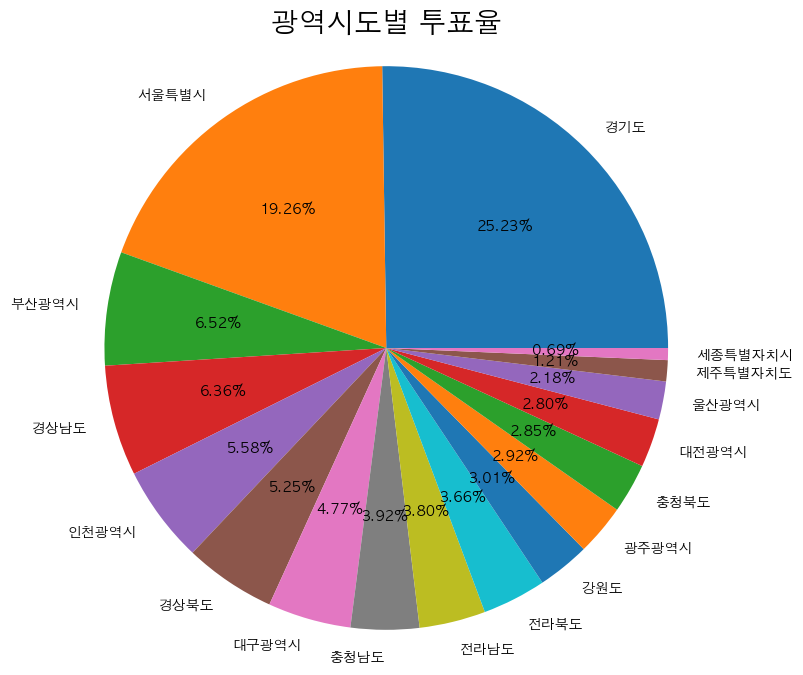

In [13]:
elect_sum_order['투표수'].plot(
    kind='pie',
    figsize=(8, 8),
    autopct='%.2f%%',
    startangle=0,
)

plt.title('광역시도별 투표율', size=20)
plt.axis('equal')
plt.rcParams['font.size']=10
plt.ylabel('')

plt.show()

### 윤석열 후보의 광역시도별 득표율을 pie chart로 표현하기

In [14]:
elect_yoon_sum = election.pivot_table('윤석열', index='광역시도', aggfunc=sum)
print(elect_yoon_sum.head())
elect_yoon_sum_order = elect_yoon_sum.sort_values(by = '윤석열', ascending=False)
print(elect_yoon_sum_order.head())

           윤석열
광역시도          
강원도     544980
경기도    3859666
경상남도   1237346
경상북도   1278922
광주광역시   124511
           윤석열
광역시도          
경기도    3859666
서울특별시  3255747
경상북도   1278922
부산광역시  1270072
경상남도   1237346


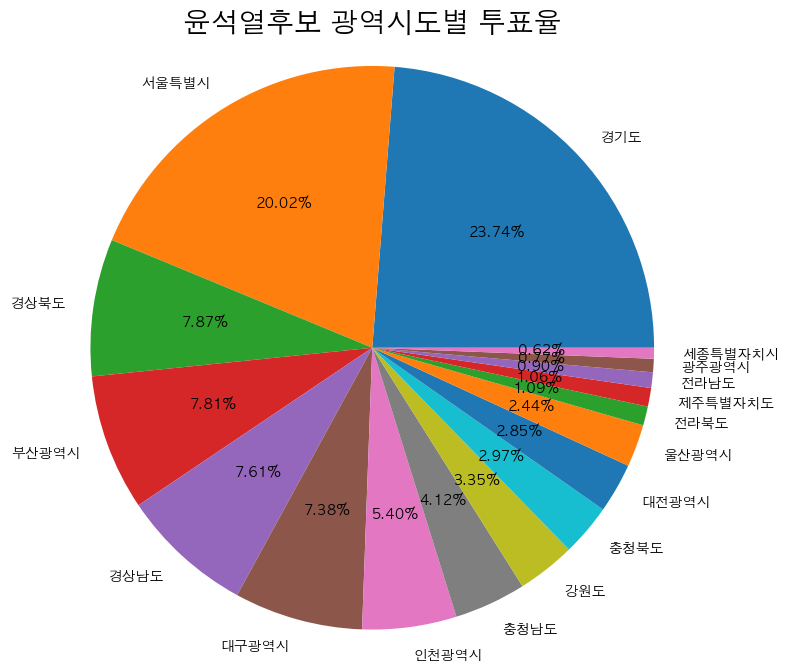

In [15]:
elect_yoon_sum_order['윤석열'].plot(
    kind='pie',
    figsize=(8, 8),
    autopct='%.2f%%',
    startangle=0,
)

plt.title('윤석열후보 광역시도별 투표율', size=20)
plt.axis('equal')
plt.rcParams['font.size']=10
plt.ylabel('')

plt.show()

In [16]:
elect_yoonSeoul_sum = election[election.광역시도 == '서울특별시'].pivot_table('윤석열', index='시군구', aggfunc=sum)
print(elect_yoonSeoul_sum.head())
elect_yoon_sumSeoul_order = elect_yoonSeoul_sum.sort_values(by = '윤석열', ascending=False)
print(elect_yoon_sumSeoul_order.head())

        윤석열
시군구        
강남구  235897
강동구  160593
강북구   86540
강서구  181510
관악구  151944
        윤석열
시군구        
송파구  255166
강남구  235897
강서구  181510
서초구  179472
노원구  163340


In [17]:
elect_top = elect_yoon_sumSeoul_order.head()
elect_top.loc['기타'] = elect_yoon_sumSeoul_order.loc[list(elect_yoon_sumSeoul_order.index)[5:]].sum()
elect_top

,윤석열
시군구,
송파구,255166
강남구,235897
강서구,181510
서초구,179472
노원구,163340
기타,2240362


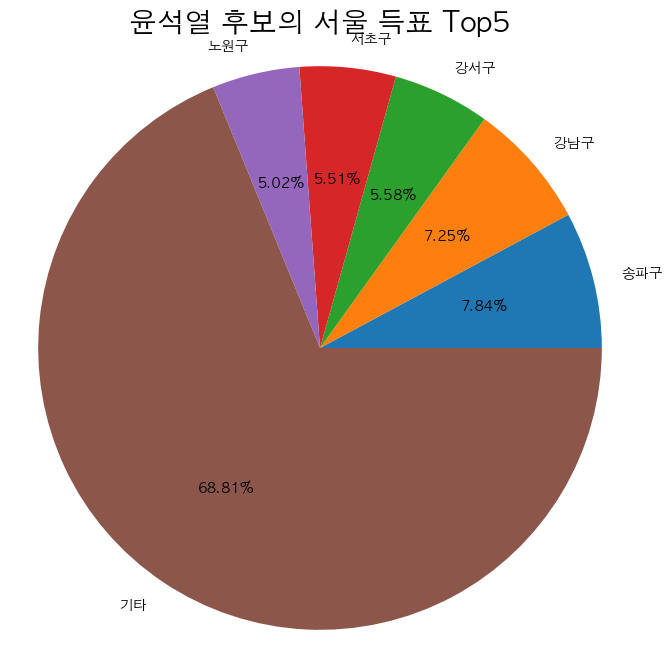

In [18]:
elect_top['윤석열'].plot(
    kind='pie',
    figsize=(8, 8),
    autopct='%.2f%%',
    startangle=0,
)

plt.title('윤석열 후보의 서울 득표 Top5', size=20)
plt.axis('equal')
plt.rcParams['font.size']=10
plt.ylabel('')

plt.show()

### 윤석열 후보의 출생지는 성북구

In [19]:
seongbuk = election[election.시군구 == '성북구'].T.loc[['윤석열','이재명','심상정']]
seongbuk.columns = ['성북구']
seongbuk.loc['기타'] = list(election[election.시군구 == '성북구']['투표수'] - election[election.시군구 == '성북구']['electionSum'])
seongbuk

,성북구
윤석열,135044
이재명,142702
심상정,8952
기타,5489


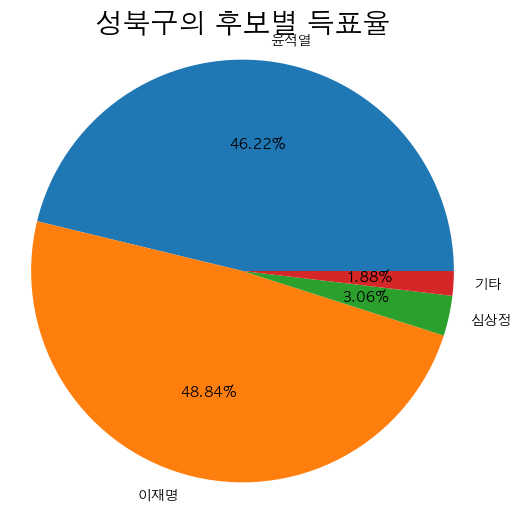

In [20]:
seongbuk['성북구'].plot(
    kind='pie',
    figsize=(6, 6),
    autopct='%.2f%%',
    startangle=0,
)

plt.title('성북구의 후보별 득표율', size=20)
plt.axis('equal')
plt.rcParams['font.size']=10
plt.ylabel('')

plt.show()

In [21]:
elect_sum = election.pivot_table(['투표수','윤석열','이재명','심상정'], index='광역시도', aggfunc=sum)
print(elect_sum.head())
elect_sum_order = elect_sum.sort_values(by = '투표수', ascending=False) / 1000
print(elect_sum_order.head())

          심상정      윤석열      이재명      투표수
광역시도                                    
강원도     25031   544980   419644  1015458
경기도    201113  3859666  4297931  8518854
경상남도    52591  1237346   794130  2146882
경상북도    33123  1278922   418371  1774284
광주광역시   14865   124511   830058   985492
           심상정       윤석열       이재명       투표수
광역시도                                        
경기도    201.113  3859.666  4297.931  8518.854
서울특별시  180.324  3255.747  2944.981  6501.831
부산광역시   47.541  1270.072   831.896  2200.224
경상남도    52.591  1237.346   794.130  2146.882
인천광역시   51.852   878.560   913.320  1883.504


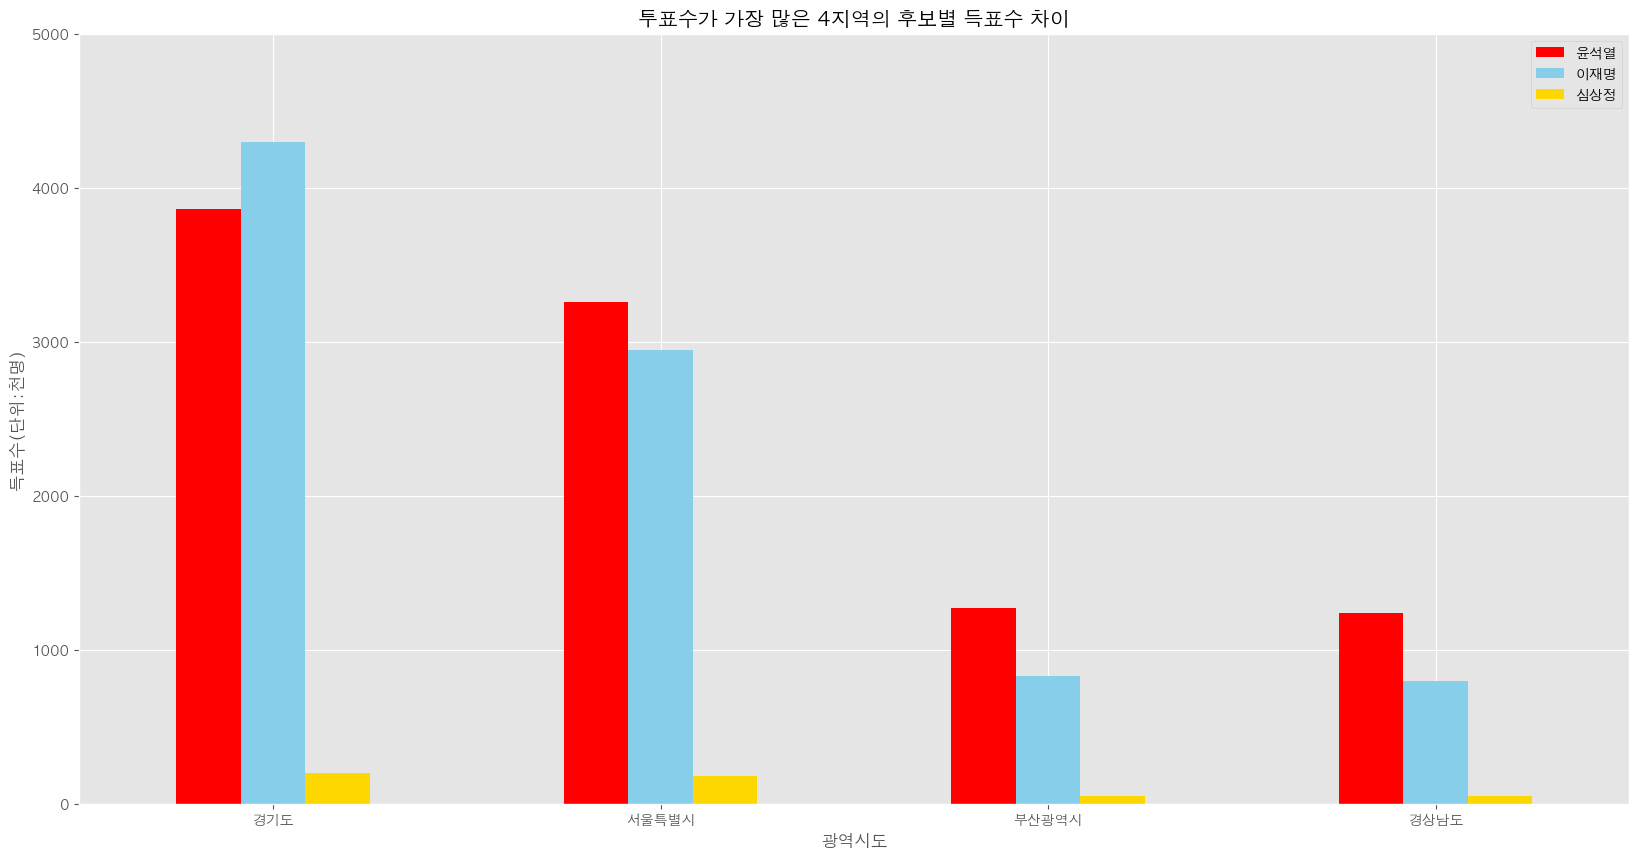

In [22]:
plt.style.use('ggplot')
elect_sum_order.head(4)[['윤석열','이재명','심상정']].plot(
    kind='bar', 
    figsize=(20,10),
    color=['red','#87CEEB','gold'],
)

plt.xticks(rotation=0)
plt.title('투표수가 가장 많은 4지역의 후보별 득표수 차이')
plt.ylim([0,5000])
plt.ylabel('득표수(단위:천명)')

plt.show()

In [23]:
elect_sum = election.pivot_table(['투표수','윤석열','이재명','심상정'], index=['광역시도','시군구'], aggfunc=sum)
elect_sum

elect_sum_order = elect_sum.sort_values(by = '투표수', ascending=False)
elect_sum_order.head()

심상정     윤석열     이재명     투표수
광역시도  시군구                                
경기도   화성시   12955  236055  283324  542027
      부천시   13249  224331  285227  532995
      남양주시  10089  203075  239179  460518
서울특별시 송파구   10652  255166  180490  453536
      강서구   11100  181510  190000  390247

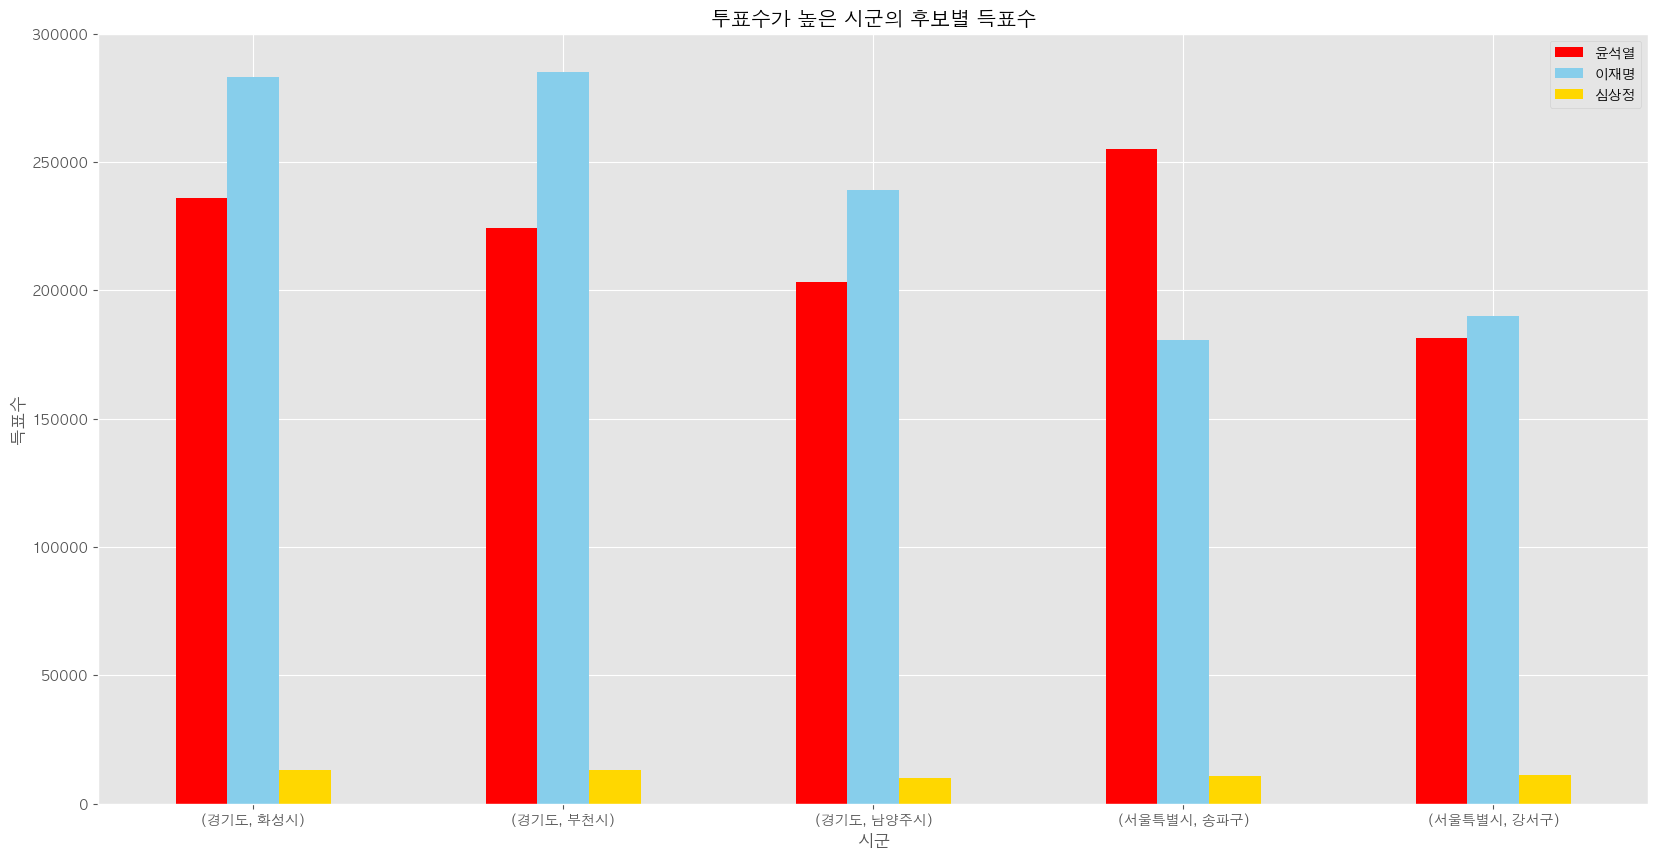

In [24]:
plt.style.use('ggplot')
elect_sum_order.head()[['윤석열','이재명','심상정']].plot(
    kind='bar', 
    figsize=(20,10),
    color=['red','#87CEEB','gold'],
)

plt.xticks(rotation=0)
plt.title('투표수가 높은 시군의 후보별 득표수')
plt.ylim([0,300000])
plt.ylabel('득표수')
plt.xlabel('시군')

plt.show()